<a href="https://colab.research.google.com/github/Ankit23232/AI/blob/main/Final_Assessment(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Breast_Cancer.csv')
print(df.head)

<bound method NDFrame.head of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        

3. Exploratoty Data Analiyis(EDA)


Dataset Values:
<bound method NDFrame.describe of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regiona

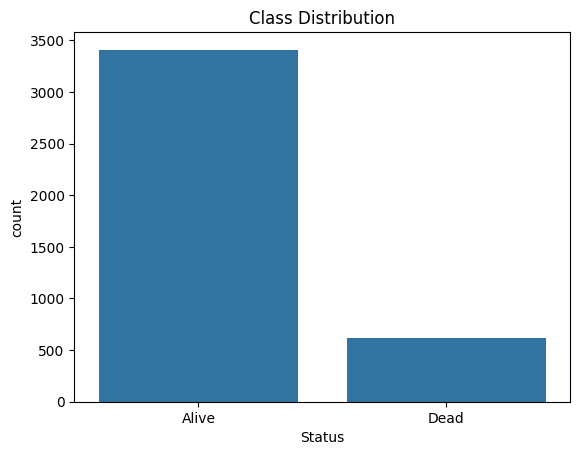

In [4]:
#Summary statistics
print("\nDataset Values:")
print(df.describe)

print('\n Missing values')
print(df.isnull().sum())

sns.countplot(x='Status', data=df)
plt.title('Class Distribution')
plt.show()

4. Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# df.copy()
print(df['Status'].unique())
print(df['Status'].isnull().sum())
# Convert target variable to binary (1 for "Alive", 0 for "Dead" assuming it has such values)
# df['Status'] = df['Status'].apply(lambda x:1 if x == "Alive" else 0)
df['Status'] = df['Status'].map({'Alive': 1, 'Dead': 0}).fillna(-1)
print(df['Status'].unique())  # Should print [0, 1]

#selecct catagorical cloumns and encode them
categorical_cols=df.select_dtypes(include=['object']).columns.tolist()
if 'Status' in categorical_cols:
    categorical_cols.remove('Status')

#Apply one-hot encoding  to categorical features
df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)


#Seperate features and target variables
X= df.drop(columns=['Status']).values
y= df['Status'].values



#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler() #compute mean and statndard deviation
scaler.fit(X_train)
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)
# X= scaler.fit_transform(x_train)



import random
def initialize_params(d):
  b= random.random()
  w = np.random.random(d)
  return b,w

b,w= initialize_params(sc_X_train.shape[1])
b,w


#define logistic function
def logistic_function(sc_X_train, w, b):
  z= b + np.dot(sc_X_train, w)
  return 1/(1+ np.exp(-z))

y_pred= logistic_function(sc_X_train, w,b)
y_pred


# #Implementing logistic regreession from scratch
# class LogisticRegression:
#   def __init__(self, learning_rate=0.01, reg_strength=0.1, epochs =1000):
#     self.learning_rate= learning_rate
#     self.reg_strength = reg_strength
#     self.epochs = epochs
#     self.weights= None
#     self.bias=None

#     def sigmoid(self,z):
#       return 1/(1+ np.exp(-z))

#     # compute_loss(self, y_actual, y_pred):
#     #   m= len(y_actual)
#     #   loss(-1/m) * np.sum(y_actual * np.log(y_pred) + (1-y_actual)* np.log(1-y_pred))
#       # reg_term = (self.reg_strength /(2* m))* np.sum(self.weights ** 2)


#     #Define cost function
#       def cost_function(y_train, y_hat, lambda_, w):
#         m = len(y_train)
#         cost = - np.sum(np.dot(y_train, np.log(y_hat)) + np.dot(1-y_train, np.log(1- y_hat)))/m + (lambda_ /2 * m * np.sum(w**2))
#         return cost




['Alive' 'Dead']
0
[1 0]


array([0.33473162, 0.39405982, 0.17656693, ..., 0.95276339, 0.99232975,
       0.94892455])

Building logistic regression from scratch

In [7]:
import random
def initialize_params(d):
  b= random.random()
  w = np.random.random(d)
  return b,w

b,w= initialize_params(sc_X_train.shape[1])
b,w


#define logistic function
def logistic_function(sc_X_train, w, b):
  z= b + np.dot(sc_X_train, w)
  return 1/(1+ np.exp(-z))

y_pred= logistic_function(sc_X_train, w,b)
y_pred


array([0.38660363, 0.2660745 , 0.03549244, ..., 0.64834901, 0.95338576,
       0.62485448])

In [8]:
def cost_function(Y_train, y_pred, lambda_, w):
    m = len(y_train)

    # Clip y_pred to avoid log(0) or log(1)
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    cost = - np.sum(np.dot(y_train, np.log(y_pred)) + np.dot(1 - y_train, np.log(1 - y_pred))) / m + (lambda_ / 2 * m * np.sum(w**2))
    return cost



In [9]:
# Update parameters
def update_parameters(y_train,y_hat,b0,w0,alpha,lambda_):
  m = len(y_train)
  dw = np.dot((y_hat-y_train),sc_X_train)/m + (lambda_/m)*w0
  db = np.sum(y_hat-y_train)/m
  w0 = w0-alpha*dw
  b0 = b0-alpha*db
  return b0,w0

In [10]:
#Gradient Descent
n_iter=1000
alpha =0.01
lambda_=0.1
cost_fun =[]
for i in range(n_iter):
  y_pred= logistic_function(sc_X_train, w, b)
  cost_now= cost_function(y_train, y_pred, lambda_,w)
  b, w = update_parameters(y_train, y_pred, b, w, alpha, lambda_)
  cost_fun.append(cost_now)

In [11]:
print(len(cost_fun))

1000


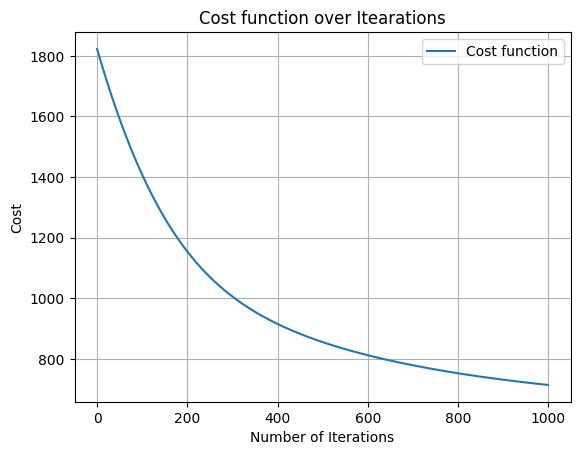

In [ ]:
plt.plot(range(n_iter), cost_fun, label="Cost function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost function over Itearations")
plt.grid()
plt.legend()
plt.show()

6. Verify using Built-in LogisticRegression from Scikit-Learn

In [ ]:
# Train logistic regression using sklearn
sklearn_log_reg = LogisticRegression()
sklearn_log_reg.fit(sc_X_train, y_train)

# Predictions
y_pred_sklearn = sklearn_log_reg.predict(sc_X_test)
# Evaluate sklearn logistic regression
print("\nScikit-Learn Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_sklearn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sklearn))



Scikit-Learn Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.81      0.42      0.56       120
           1       0.91      0.98      0.94       685

    accuracy                           0.90       805
   macro avg       0.86      0.70      0.75       805
weighted avg       0.89      0.90      0.89       805

Confusion Matrix:
[[ 51  69]
 [ 12 673]]


7. Cross-verify using random forest classifier

In [ ]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest Model
print("\nRandom Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.85      0.50      0.63       120
           1       0.92      0.98      0.95       685

    accuracy                           0.91       805
   macro avg       0.88      0.74      0.79       805
weighted avg       0.91      0.91      0.90       805

Confusion Matrix:
[[ 60  60]
 [ 11 674]]


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc
y_hat_pred = logistic_function(sc_X_test, w,b)
y_predict= (y_hat_pred>= 0.5).astype(int)
accuracy_score(y_predict, y_test)

0.8708074534161491

<function matplotlib.pyplot.show(close=None, block=None)>

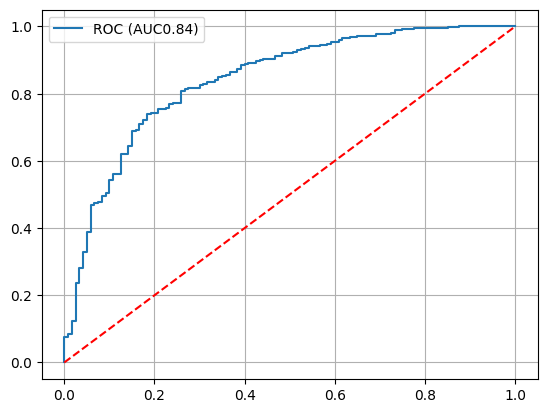

In [ ]:
fpr, tpr,_= roc_curve(y_test, y_hat_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC (AUC{roc_auc:.2f})')
plt.plot([0,1], [0,1], color='r', linestyle='--')
plt.legend()
plt.grid()
plt.show

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
log = LogisticRegressionCV()
log.fit(sc_X_train, y_train)


LogisticRegressionCV()

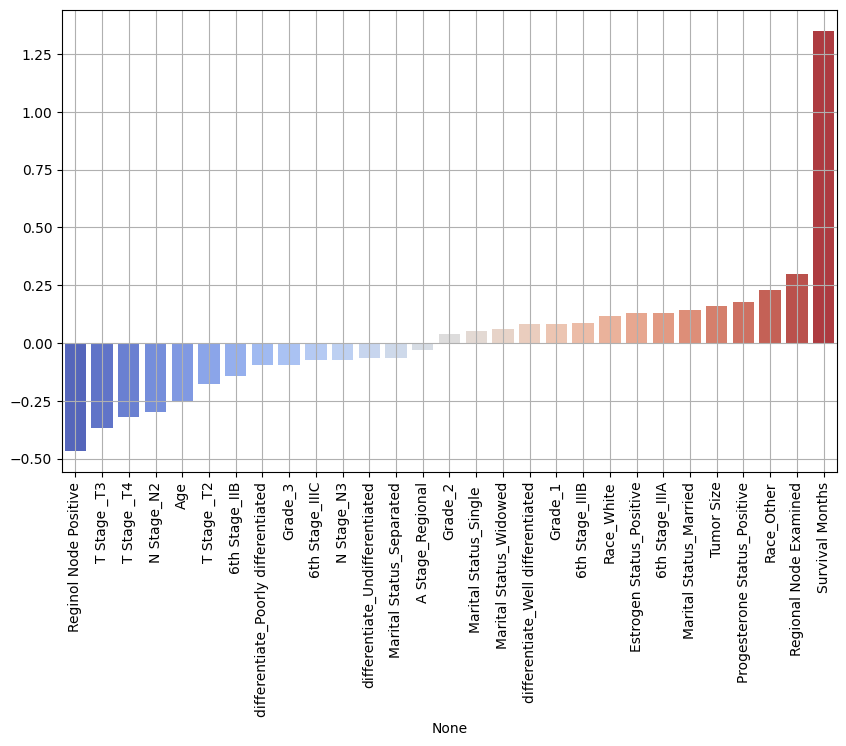

In [ ]:

plt.figure(figsize=(10,6))
feature_names = df.drop(columns=['Status']).columns
coefs = pd.Series(index= feature_names, data=log.coef_[0])
coefs= coefs.sort_values()
sns.barplot(x=coefs.index,y=coefs.values,hue=coefs.index,palette='coolwarm')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("\nBest Parameters for Random Forest:", grid_search.best_params_)

# Predictions with the optimized model
y_pred_best_rf = grid_search.best_estimator_.predict(X_test)

# Evaluating Optimized Random Forest Model
print("\nOptimized Random Forest Model Performance:")
print(classification_report(y_test, y_pred_best_rf))


Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}

Optimized Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.90      0.50      0.64       120
           1       0.92      0.99      0.95       685

    accuracy                           0.92       805
   macro avg       0.91      0.74      0.80       805
weighted avg       0.92      0.92      0.91       805

